### Here we will see how to read the DL1 data check information from night-wise hdf5 files, and the meaning of their contents

Loading many night-wise files in a table allow us to perform studies of the long-term behaviour of the DL1 check quantities, to e.g. verify the stability of the telescope performance, or the quality of the recorded data.

It can also help to investigate the reason of anomalies observed in the DL1 datacheck log and html files, since we can have access to some information subrun-wise.


In [1]:
import glob
from ctapipe.io import read_table
from astropy.table import Table, vstack
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

In [2]:
# If you're running in your own computer, set the school's data directory path:
SCHOOL_DATASET = "../data"

# Set the input files:
datacheck_files = glob.glob(SCHOOL_DATASET+"/DL1_datacheck/202011*/DL1_datacheck_*.h5")
datacheck_files.sort()
print(datacheck_files)

['../data/DL1_datacheck/20201119/DL1_datacheck_20201119.h5', '../data/DL1_datacheck/20201120/DL1_datacheck_20201120.h5', '../data/DL1_datacheck/20201121/DL1_datacheck_20201121.h5']


### Contents of the night-wise DL1 datacheck hdf5 files

There are five different tables in each file:

- runsummary

- pixwise_runsummary

- cosmics

- flatfield

- pedestals

In [3]:
# Create empty tables for DL1 data check quantities:

dcheck_pixwise_runsummary = Table()
dcheck_runsummary = Table()

dcheck_cosmics = Table()
dcheck_flatfield = Table()
dcheck_pedestals = Table()


for file in datacheck_files:
    dcheck_pixwise_runsummary = vstack([dcheck_pixwise_runsummary, read_table(file, "/pixwise_runsummary")])
    dcheck_runsummary = vstack([dcheck_runsummary, read_table(file, "/runsummary/table")])

    dcheck_cosmics = vstack([dcheck_cosmics, read_table(file, "/cosmics/table")])
    dcheck_flatfield = vstack([dcheck_flatfield, read_table(file, "/flatfield/table")])
    dcheck_pedestals = vstack([dcheck_pedestals, read_table(file, "/pedestals/table")])

### pixwise_runsummary table

Contains one row per run number (which typically corresponds to 20 minutes of data). Besides the runnumber and the average timestamp of the recorded events ("time") the rest of the table columns are pixel-wise run-averaged quantities:

- fraction of all pulses brighter than 10 p.e. in cosmics
- fraction of all pulses brighter than 30 p.e. in cosmics
- mean pixel charge in interleaved flatfield events (p.e.)
- standard deviation of pixel charge in interleaved flatfield events (p.e.)
- mean pixel time (relative to the event's average pixel time for the rest of the camera) in interleaved flatfield events
- standard deviation of the pixel time (the same as above) in interleaved flatfield events
- mean pixel charge in interleaved pedestal events
- standard deviation of pixel charge in interleaved pedestal events
- fraction of all pulses brighter than 10 p.e. in interleaved pedestal events
- fraction of all pulses brighter than 30 p.e. in interleaved pedestal events


In [4]:
dcheck_pixwise_runsummary

cosmics_pix_fraction_pulses_above10 [1855],cosmics_pix_fraction_pulses_above30 [1855],ff_pix_charge_mean [1855],ff_pix_charge_stddev [1855],ff_pix_rel_time_mean [1855],ff_pix_rel_time_stddev [1855],ped_pix_charge_mean [1855],ped_pix_charge_stddev [1855],ped_pix_fraction_pulses_above10 [1855],ped_pix_fraction_pulses_above30 [1855],runnumber,time
float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float64
0.0057860943 .. 0.004592127,0.0011775048 .. 0.000677614,73.32421 .. 74.01317,9.5189495 .. 10.268484,-0.04541323 .. -0.054710258,0.38973835 .. 0.39498782,2.0724378 .. 2.1020105,1.6577878 .. 1.6964904,0.00057715515 .. 0.001128076,0.0 .. 0.0,2949,1605835609.6631517
0.0046326 .. 0.003967443,0.0008733898 .. 0.0005070749,71.76357 .. 73.664764,9.34422 .. 10.236679,-0.0547147 .. -0.06016992,0.3907416 .. 0.39427286,2.0909023 .. 2.1297243,1.6592083 .. 1.7144381,0.0005912191 .. 0.001242417,0.0 .. 0.0,2950,1605837241.49913
0.0051134923 .. 0.0041638156,0.0008559304 .. 0.0005583482,71.22178 .. 73.27142,9.342761 .. 10.173382,-0.05078523 .. -0.054838266,0.39215523 .. 0.39686033,2.099297 .. 2.141171,1.7056472 .. 1.7293783,0.00074132293 .. 0.0013218771,0.0 .. 0.0,2952,1605840916.190122
0.004156948 .. 0.0039574266,0.0006415753 .. 0.00044698207,71.841576 .. 73.44904,9.35194 .. 10.201086,-0.050942786 .. -0.05691177,0.3906826 .. 0.3942032,2.112199 .. 2.1785212,1.7079221 .. 1.7683388,0.00068045844 .. 0.0014934738,8.837123e-06 .. 8.837123e-06,2953,1605842271.5923777
0.004427393 .. 0.0039062733,0.00069964374 .. 0.00046897947,72.072685 .. 74.115486,9.380152 .. 10.265275,-0.04243864 .. -0.060721796,0.39019287 .. 0.39376372,2.121567 .. 2.1369736,1.708237 .. 1.7225566,0.0007199616 .. 0.0011021635,0.0 .. 0.0,2954,1605843590.4058847
0.004728086 .. 0.0037149244,0.0008244112 .. 0.00046720696,73.58108 .. 74.736145,9.528185 .. 10.28803,-0.04039737 .. -0.07079217,0.38977307 .. 0.3935175,2.160096 .. 2.1050253,1.7473419 .. 1.6948432,0.00089814176 .. 0.0011047143,0.0 .. 0.0,2955,1605844864.3147085
...,...,...,...,...,...,...,...,...,...,...,...
0.0050000036 .. 0.0038108036,0.000958841 .. 0.00053524587,70.314835 .. 74.05347,9.156495 .. 10.228109,-0.11382668 .. 0.0057573076,0.4031202 .. 0.3934396,1.9850459 .. 2.050613,1.5896416 .. 1.6646519,0.00044215447 .. 0.0010196624,0.0 .. 0.0,2990,1606015242.93738
0.004980342 .. 0.0038033593,0.0009783731 .. 0.0005451078,70.2656 .. 73.92293,9.197314 .. 10.219552,-0.10711535 .. 0.010225438,0.4049972 .. 0.39469212,2.0161967 .. 2.059368,1.6188216 .. 1.6646324,0.00045148726 .. 0.001088881,0.0 .. 0.0,2991,1606016488.734309


### runsummary table

The table contains one row per run, with the following columns:

- runnumber
- time (unix timestamp)
- elapsed_time (in s)
- minimum, maximum and mean telescope altitude in the run (rad)
- number of cosmics, interleaved pedestals and interleaved flatfield events
- number of identified wrong UCTS event tags (respectively in cosmics, pedestals and flatfield events)
- number of identified "UCTS jumps"
- number of identified wrong TIB event tags (respectively in cosmics, pedestals and flatfield events)
- number of interleaved pedestals that survived cleaning
- number of "contained" muon rings
- mean flatfield charge, error of the mean, and standard deviation (p.e.)
- mean flatfield time, error of the mean, and standard deviation (ns)
- standard deviation of the "relative" flatfield time (each pixel's ttime - camera average), i.e. without trigger jitter (ns)
- mean pedestal charge, error of the mean, and standard deviation (p.e.)
- fraction of pulses above 10 pe (and 30 pe) in interleaved pedestals and in cosmics
- mean telescope efficiency as determined from a likelihood fit to muon rings, and its standard deviation
- mean fitted muon ring width, and its standard deviation (degrees)
- mean HG sample number (within the waveform) of the pulse peak in muon ring events, and its standard deviation
- mean muon ring intensity (p.e.)

In [5]:
dcheck_runsummary

index,runnumber,time,elapsed_time,min_altitude,mean_altitude,max_altitude,num_cosmics,num_pedestals,num_flatfield,num_wrong_ucts_tags_in_cosmics,num_wrong_ucts_tags_in_pedestals,num_wrong_ucts_tags_in_flatfield,num_ucts_jumps,num_wrong_tib_tags_in_cosmics,num_wrong_tib_tags_in_pedestals,num_wrong_tib_tags_in_flatfield,num_pedestals_after_cleaning,num_contained_mu_rings,ff_charge_mean,ff_charge_mean_err,ff_charge_stddev,ff_time_mean,ff_time_mean_err,ff_time_stddev,ff_rel_time_stddev,ped_charge_mean,ped_charge_mean_err,ped_charge_stddev,ped_fraction_pulses_above10,ped_fraction_pulses_above30,cosmics_fraction_pulses_above10,cosmics_fraction_pulses_above30,mu_effi_mean,mu_effi_stddev,mu_width_mean,mu_width_stddev,mu_hg_peak_sample_mean,mu_hg_peak_sample_stddev,mu_intensity_mean
int64,int64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32
0,2949,1605835609.6631517,1188.6673340797424,1.1851324801339993,1.222411199959218,1.2581890228542567,5649234,114354,114421,0,1,114421,1,0,0,113421,227,3682,72.98419341647337,0.08760065374332086,9.975019006572735,20.96745353434248,0.004247428003329771,0.9687012808867344,0.3997686009935569,2.2333146054816364,0.006448951584819596,1.7995636810673612,0.00197898265220493,4.431314553705103e-07,0.007142468329797379,0.001025232715590255,0.16854081694634054,0.016500128041317286,0.0700963129279928,0.023020814099416753,14.991852254209668,2.34070065040523,2072.5164
1,2950,1605837241.49913,1233.9641201496124,1.2910704396338748,1.3265548891662589,1.3610199680099417,8255191,116708,116851,0,1,116851,0,105289,106728,116851,162,3875,72.74732455904731,0.08412509962457192,9.954611813329523,20.964817619282634,0.00401133194454887,0.9787432085104383,0.40073422934547925,2.218751259272708,0.0051855916199836614,1.787767176937905,0.001744908180547263,1.0115784624136706e-06,0.005786221985049954,0.0007720457231892488,0.16895976420732764,0.01436716004199002,0.07023388023641979,0.020325934213252697,15.279741935483871,2.5217054515939665,2073.364
2,2952,1605840916.190122,1165.6801269054413,1.4433945471409058,1.4536398004589597,1.4573930183215376,5568210,111962,111990,0,1,111990,0,0,0,111990,206,3707,72.38354283343281,0.06577736829936066,9.94307602239488,20.394155301927043,0.0031620440800373753,0.9696267508624256,0.3993267733300926,2.240510765847604,0.0036736273474337632,1.8197914173327783,0.0016516626188775735,7.222319509540951e-07,0.00620279404661012,0.0008213680635660491,0.1695643632518138,0.015759412312095475,0.07093868632967322,0.021787973078582913,15.449689776099271,2.6204068155365787,2058.6277
3,2953,1605842271.5923777,1185.4652915000916,1.3691739244147452,1.399505127494729,1.423495572617913,6696018,113159,113078,0,1,113078,0,29044,29631,113078,160,3799,72.18003888472153,0.05407492791541314,9.91113916419262,20.70692432281694,0.0022123265162338514,0.9750772919651775,0.3986539074647762,2.2308823248799037,0.0038255181332611746,1.8095579606178924,0.0014434142222275366,8.174934255735239e-06,0.005014063638622012,0.0006311772345876637,0.16834592269784826,0.014115111998071948,0.06973491441077352,0.020240834205447613,15.197683600947618,2.5330121405934833,2066.1858
4,2954,1605843590.4058847,1181.371332168579,1.3111068656301859,1.3449386141583355,1.3775571352548444,7057878,112506,112533,0,2,112533,0,0,0,112533,287,3689,72.58703490801051,0.06338153672439586,9.948652894893817,20.686712390686186,0.002722864006306526,0.9828307076266313,0.39935943722564154,2.2881749789004626,0.005400055040625433,1.8500377902575442,0.0020337938969699995,9.631112576062433e-07,0.005770258433754219,0.0006488528123068052,0.16879689198252792,0.01424973180460896,0.07171634410154268,0.020404814602589767,15.03225806451613,2.5557324284339846,2039.4844
5,2955,1605844864.3147085,1173.4701459407806,1.2208559466063584,1.2561495064155244,1.29146

Let's do for example a simple plot of the mean intensity of muon rings vs. time:

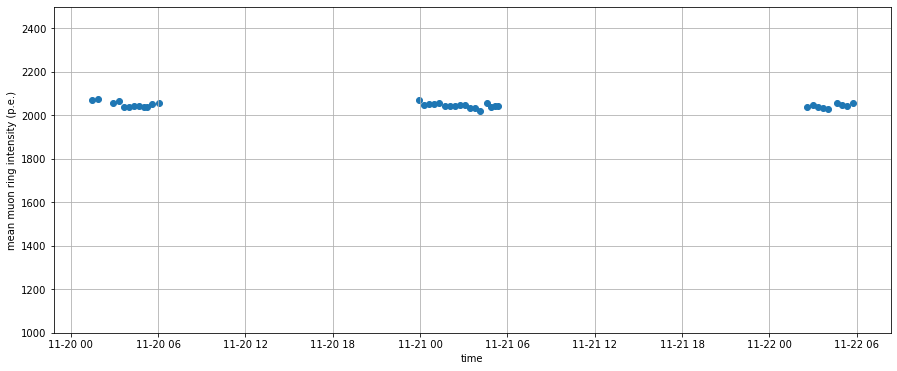

In [6]:
plt.figure(figsize=(15,6))
utctime = [datetime.utcfromtimestamp(x) for x in dcheck_runsummary['time']]

plt.scatter(utctime, dcheck_runsummary['mu_intensity_mean'])
plt.ylim(1000, 2500)
plt.xlabel('time')
plt.ylabel('mean muon ring intensity (p.e.)')
plt.grid()
plt.show()

### cosmics, flatfield and pedestals tables
The tables "cosmics", "flatfield" and "pedestals" contain one row __per sub-run__ (one full subrun has 53000 recorded events, typically corresponding to between ~ 6 and 10 seconds of data depending on the trigger rate). the columns are essentially the same as those of the runsummary table, but only the ones relevant to each type of event.

In [7]:
dcheck_cosmics

index,runnumber,subrun,time,elapsed_time,events,azimuth,altitude,wrong_ucts_trig_type,wrong_tib_trig_type,num_ucts_jumps,num_contained_mu_rings,mu_effi_mean,mu_effi_stddev,mu_width_mean,mu_width_stddev,mu_radius_mean,mu_radius_stddev,mu_intensity_mean,mu_hg_peak_sample,mu_hg_peak_sample_stddev,fraction_pulses_above10,fraction_pulses_above30
int64,int64,int64,float64,float64,int64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,2949,0,1605835010.0114985,7.746758460998535,51550,1.7755674589002104,1.1851324801339993,0,0,0,20,0.16786525877769898,0.009128852366241528,0.06405775467673767,0.01791906508097826,1.1047820154138503,0.087856062410049,2187.908203125,14.15,1.7554426642213128,0.005942666816557343,0.0007787796633211417
1,2949,1,1605835018.1000082,8.367798089981079,51416,1.776112103848219,1.1856401779637409,0,0,0,29,0.1631859478334169,0.010122787331248759,0.06421323712076639,0.016386605150491923,1.079790917307326,0.1069279197147759,2038.745849609375,14.827586206896552,2.0012311481621468,0.006173899112445516,0.0008229999198965617
2,2949,2,1605835026.6564808,8.825063228607178,51319,1.776704634002593,1.1861744158781842,0,0,0,28,0.17030709256058868,0.015809128414096065,0.06876891558698463,0.019124232633182324,1.0873822063861713,0.09853787867739848,2134.869873046875,14.678571428571429,2.6950375717654684,0.006312201115699912,0.0008515102065727142
3,2949,3,1605835035.7093701,9.319221496582031,51235,1.7773188848253698,1.1867545115472784,0,0,0,31,0.16728080059019054,0.0130007107695471,0.07332178887683415,0.017034083063509044,1.0708685968427305,0.11235511013634326,1956.2620849609375,14.419354838709678,1.6886719347539967,0.0065197176900372135,0.000890658418991608
4,2949,4,1605835045.1630514,9.559560775756836,51164,1.7779504591615147,1.187349818506114,0,0,0,37,0.16570843949116704,0.011100603907876158,0.06394787459528616,0.020612089158287935,1.096468187261146,0.11390219319417405,2153.066162109375,14.162162162162161,1.6585387395990334,0.006631421056879406,0.000902999729636383
5,2949,5,1605835054.8640246,9.78669261932373,51131,1.7785918778282992,1.187931521922818,0,0,0,27,0.1643943761061998,0.009705144615433654,0.06641859052154284,0.021005757066535673,1.0979749627140838,0.11168520716619378,2054.126220703125,14.962962962962964,1.9111309877718095,0.007042530836573737,0.0009740637138335171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,2996,124,1606024299.02211,8.85084843635559,51292,4.072877967918509,0.9796645143905481,0,0,0,29,0.16953202034315076,0.018448210039044392,0.0671644799103157,0.018704644167486583,1.085976561626083,0.11304183330228702,2147.26611328125,15.413793103448276,2.4859209471873847,0.005668459618025478,0.0008197975630463539
1288,2996,125,1606024307.881985,8.855797529220581,51310,4.073665151029022,0.9792250397339574,0,0,0,15,0.16623608138766457,0.012611209621724193,0.065717528752742,0.014069660611653928,1.1118513623295054,0.10461759168786833,2131.525634765625,15.466666666666667,2.2318047362958033,0.005608055469607339,0.0008084467280695903


In [8]:
dcheck_flatfield

index,runnumber,subrun,time,elapsed_time,events,azimuth,altitude,wrong_ucts_trig_type,wrong_tib_trig_type,num_ucts_jumps,charge_mean,charge_stddev,rel_time_mean,rel_time_stddev
int64,int64,int64,float64,float64,int64,float64,float64,int64,int64,int64,float32,float32,float64,float64
0,2949,0,1605835010.203231,7.746758460998535,724,1.7755674589002104,1.1851324801339993,724,724,0,73.21088,9.965975,5.735913895677965e-05,0.39849575565390405
1,2949,1,1605835018.171414,8.367798089981079,794,1.776112103848219,1.1856401779637409,794,794,0,73.149666,9.97219,6.185446513301677e-05,0.39928049470058263
2,2949,2,1605835026.7549255,8.825063228607178,844,1.776704634002593,1.1861744158781842,844,844,0,73.12601,9.971806,5.4504144316122324e-05,0.3999293396420591
3,2949,3,1605835035.8611584,9.319221496582031,881,1.7773188848253698,1.1867545115472784,881,881,0,73.05385,9.973248,3.938424072163264e-05,0.399787276103869
4,2949,4,1605835045.3606446,9.559560775756836,917,1.7779504591615147,1.187349818506114,917,917,0,73.00334,9.9676695,8.846990084362621e-05,0.3988889893152663
5,2949,5,1605835054.9377835,9.78669261932373,934,1.7785918778282992,1.187931521922818,934,934,0,72.883644,9.953323,5.5719536460853604e-05,0.3995022518771994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,2996,124,1606024299.2793152,8.85084843635559,851,4.072877967918509,0.9796645143905481,851,0,0,71.254776,9.735986,-6.642525611984843e-07,0.3986306408801425
1288,2996,125,1606024307.923608,8.855797529220581,843,4.073665151029022,0.9792250397339574,843,0,0,71.26174,9.733527,-5.428858688160437e-07,0.3989394218767753


We had seen that run 2961 had some unidentified problem with interleaved flatfield events (way too high rate!) Let's try to plot for that run the rate of interleaved flatfield events vs. time (we have one point per subrun now, i.e. every few seconds). Let's compare it with a run with no reported anomaly, e.g. 2970:

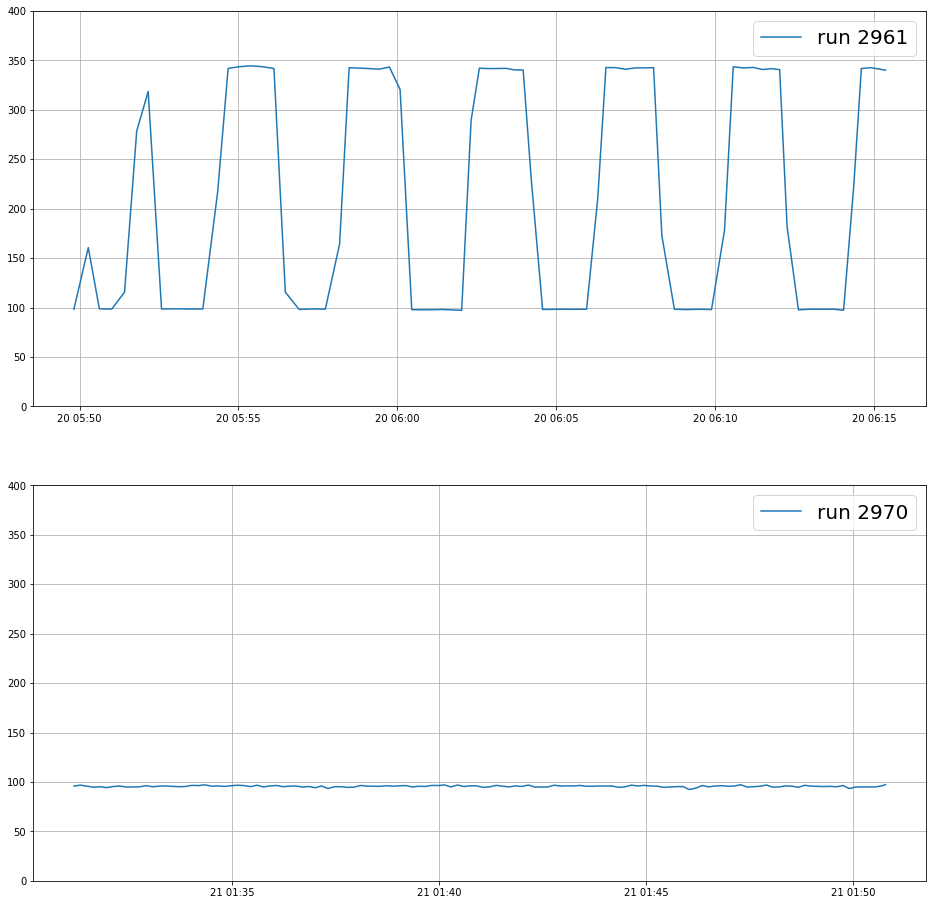

In [9]:
fig = plt.figure(figsize=(16,16))

runs = [2961, 2970]

for i, run in enumerate(runs):
    mask = dcheck_flatfield['runnumber'] == run # Select run number
    utctime = [datetime.utcfromtimestamp(x) for x in dcheck_flatfield['time'][mask]]
    ff_rate = dcheck_flatfield['events'] / dcheck_flatfield['elapsed_time']
    fig.add_subplot(2, 1, i+1)
    plt.plot(utctime, ff_rate[mask], label=f'run {run}')
    plt.legend(fontsize=20)
    plt.grid()
    plt.ylim(0, 400)

plt.show()

The anomalies in the rate of flatfield events in run 2961 seem to come and go at regular intervals of ~4 minutes, last for 2 minutes, and increase the rate from ~100 z to 350 Hz. This is MAGIC's LIDAR illuminating LST1...